<b>TWO:<br>
<b>1) Extract reviews of any product from ecommerce website like amazon<br>
<b>2) Perform emotion mining

----------------------------------------------------------------------------------------------------------------------------------------------

<b>EMOTION ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

<b><h3>WEBSCRAPING FROM AMAZON

In [2]:
import requests
from bs4 import BeautifulSoup
from time import sleep

In [36]:
scraped_text = ''

for i in range(1,11):
    url = f'https://www.amazon.in/Samsung-Galaxy-Green-128GB-Storage/product-reviews/B0BY8PYVS6/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={i}'

    r = requests.get(url)

    if r.status_code!= 200:
    
        print('Website not accessible, Status code is :',r.status_code)
        break

    else:
        soup = BeautifulSoup(r.text, 'html.parser')
        review = soup.find_all('div' , {'data-hook' : 'review'})
    
        if review is not None:
        
            for item in review:
                scraped_text += (item.find('span' , {'data-hook' : {'review-body'}}).get_text(strip=True) + '\n')
    
        else:
        
            print('Last Page')
        
        
print(scraped_text)

Website not accessible, Status code is : 503
Every review that you have seen about this phone is true to quite an extent.Great camera, good features, and premium quality and is the perfect size for me. I would prefer a 6" phone but that's the best you can get. It's a little on the heavier side but it doesn't really matter if you are using headphones.The cons:1 - Battery drains really fast. The reviews I saw did not warn about it. This is my biggest grudge, having gone a bit over budget.2 - Samsung's boring UI. BTW I never imagined I would buy a Samsung product. But seeing the comparos with iPhone 14, I felt I should give it a go. One Plus, for instance, gives a swipe option to go back to the previous page. Samsung still depends on the back button at the bottom of the phone. After using One Plus, this seems prehistoric and inconvenient. It would request Samsung if they make this small change.3 - For some weird reason, it takes very long to start. It's a costly phone. I do not expect it 

<b>Lets export the scraped data

In [37]:
with open('amazon_scraped.txt', 'w', encoding='utf-8') as file:
    text_to_save = scraped_text
    file.write(text_to_save)

In [38]:
scraped_text

'Every review that you have seen about this phone is true to quite an extent.Great camera, good features, and premium quality and is the perfect size for me. I would prefer a 6" phone but that\'s the best you can get. It\'s a little on the heavier side but it doesn\'t really matter if you are using headphones.The cons:1 - Battery drains really fast. The reviews I saw did not warn about it. This is my biggest grudge, having gone a bit over budget.2 - Samsung\'s boring UI. BTW I never imagined I would buy a Samsung product. But seeing the comparos with iPhone 14, I felt I should give it a go. One Plus, for instance, gives a swipe option to go back to the previous page. Samsung still depends on the back button at the bottom of the phone. After using One Plus, this seems prehistoric and inconvenient. It would request Samsung if they make this small change.3 - For some weird reason, it takes very long to start. It\'s a costly phone. I do not expect it to be so slow4 - Again, the reviews I w

<b>Text Preprocessing

In [39]:
import re

In [40]:
def clean_text(text):
    text = re.sub('\'s','',text)
    text= re.sub('\'t','',text)
    text = re.sub('\n+','',text)
    text = re.sub(r'[^\w\s]', '' , text )
    
    return text

In [41]:
cleaned_text = clean_text(scraped_text)
cleaned_text

'Every review that you have seen about this phone is true to quite an extentGreat camera good features and premium quality and is the perfect size for me I would prefer a 6 phone but that the best you can get It a little on the heavier side but it doesn really matter if you are using headphonesThe cons1  Battery drains really fast The reviews I saw did not warn about it This is my biggest grudge having gone a bit over budget2  Samsung boring UI BTW I never imagined I would buy a Samsung product But seeing the comparos with iPhone 14 I felt I should give it a go One Plus for instance gives a swipe option to go back to the previous page Samsung still depends on the back button at the bottom of the phone After using One Plus this seems prehistoric and inconvenient It would request Samsung if they make this small change3  For some weird reason it takes very long to start It a costly phone I do not expect it to be so slow4  Again the reviews I watched said it only warms up a bit only if aft

In [42]:
#lets remove emojies
from emoji import demojize
cleaned_text2 = demojize(cleaned_text)
cleaned_text2

'Every review that you have seen about this phone is true to quite an extentGreat camera good features and premium quality and is the perfect size for me I would prefer a 6 phone but that the best you can get It a little on the heavier side but it doesn really matter if you are using headphonesThe cons1  Battery drains really fast The reviews I saw did not warn about it This is my biggest grudge having gone a bit over budget2  Samsung boring UI BTW I never imagined I would buy a Samsung product But seeing the comparos with iPhone 14 I felt I should give it a go One Plus for instance gives a swipe option to go back to the previous page Samsung still depends on the back button at the bottom of the phone After using One Plus this seems prehistoric and inconvenient It would request Samsung if they make this small change3  For some weird reason it takes very long to start It a costly phone I do not expect it to be so slow4  Again the reviews I watched said it only warms up a bit only if aft

In [43]:
#We have cleaned the text lets convert it to lowe case

cleaned_text3 = cleaned_text2.lower()
cleaned_text3[0:1000]

'every review that you have seen about this phone is true to quite an extentgreat camera good features and premium quality and is the perfect size for me i would prefer a 6 phone but that the best you can get it a little on the heavier side but it doesn really matter if you are using headphonesthe cons1  battery drains really fast the reviews i saw did not warn about it this is my biggest grudge having gone a bit over budget2  samsung boring ui btw i never imagined i would buy a samsung product but seeing the comparos with iphone 14 i felt i should give it a go one plus for instance gives a swipe option to go back to the previous page samsung still depends on the back button at the bottom of the phone after using one plus this seems prehistoric and inconvenient it would request samsung if they make this small change3  for some weird reason it takes very long to start it a costly phone i do not expect it to be so slow4  again the reviews i watched said it only warms up a bit only if aft

<b>Tokenize the text

In [44]:
from nltk.tokenize import word_tokenize

In [45]:
token = word_tokenize(cleaned_text3)
token

['every',
 'review',
 'that',
 'you',
 'have',
 'seen',
 'about',
 'this',
 'phone',
 'is',
 'true',
 'to',
 'quite',
 'an',
 'extentgreat',
 'camera',
 'good',
 'features',
 'and',
 'premium',
 'quality',
 'and',
 'is',
 'the',
 'perfect',
 'size',
 'for',
 'me',
 'i',
 'would',
 'prefer',
 'a',
 '6',
 'phone',
 'but',
 'that',
 'the',
 'best',
 'you',
 'can',
 'get',
 'it',
 'a',
 'little',
 'on',
 'the',
 'heavier',
 'side',
 'but',
 'it',
 'doesn',
 'really',
 'matter',
 'if',
 'you',
 'are',
 'using',
 'headphonesthe',
 'cons1',
 'battery',
 'drains',
 'really',
 'fast',
 'the',
 'reviews',
 'i',
 'saw',
 'did',
 'not',
 'warn',
 'about',
 'it',
 'this',
 'is',
 'my',
 'biggest',
 'grudge',
 'having',
 'gone',
 'a',
 'bit',
 'over',
 'budget2',
 'samsung',
 'boring',
 'ui',
 'btw',
 'i',
 'never',
 'imagined',
 'i',
 'would',
 'buy',
 'a',
 'samsung',
 'product',
 'but',
 'seeing',
 'the',
 'comparos',
 'with',
 'iphone',
 '14',
 'i',
 'felt',
 'i',
 'should',
 'give',
 'it',
 'a'

In [46]:
#Remove stopwords
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
token2 = [word for word in token if word not in stopword]
token2

['every',
 'review',
 'seen',
 'phone',
 'true',
 'quite',
 'extentgreat',
 'camera',
 'good',
 'features',
 'premium',
 'quality',
 'perfect',
 'size',
 'would',
 'prefer',
 '6',
 'phone',
 'best',
 'get',
 'little',
 'heavier',
 'side',
 'really',
 'matter',
 'using',
 'headphonesthe',
 'cons1',
 'battery',
 'drains',
 'really',
 'fast',
 'reviews',
 'saw',
 'warn',
 'biggest',
 'grudge',
 'gone',
 'bit',
 'budget2',
 'samsung',
 'boring',
 'ui',
 'btw',
 'never',
 'imagined',
 'would',
 'buy',
 'samsung',
 'product',
 'seeing',
 'comparos',
 'iphone',
 '14',
 'felt',
 'give',
 'go',
 'one',
 'plus',
 'instance',
 'gives',
 'swipe',
 'option',
 'go',
 'back',
 'previous',
 'page',
 'samsung',
 'still',
 'depends',
 'back',
 'button',
 'bottom',
 'phone',
 'using',
 'one',
 'plus',
 'seems',
 'prehistoric',
 'inconvenient',
 'would',
 'request',
 'samsung',
 'make',
 'small',
 'change3',
 'weird',
 'reason',
 'takes',
 'long',
 'start',
 'costly',
 'phone',
 'expect',
 'slow4',
 'revi

In [47]:
print('lenghth before removing stopword:',len(token))
print('lenghth after removing stopword:',len(token2))

lenghth before removing stopword: 2028
lenghth after removing stopword: 1195


<b>Emotion Mining Using NLTK-NRCLexicon

In [48]:
#Convert the Emotion_Lexicon file to a Dictionary

lexicon_file_path = r'C:\Users\CSC\Desktop\jup\Excelr Assignment Solutions\NLP Text Mining\NRC-Emotion-Lexicon\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
lexicon_emotion = {}

with open(lexicon_file_path,'r',encoding='utf-8') as file:
    for line in file:
        word, emotion, value = line.strip().split('\t')
        if int(value) == 1:
            if word not in lexicon_emotion:
                lexicon_emotion[word] = []
            lexicon_emotion[word].append(emotion)

In [49]:
lexicon_emotion

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [50]:
len(lexicon_emotion)

6453

In [51]:
# Initialize emotion counters
# emotion_counters = {emotion: 0 for emotions in lexicon_emotion.values() for emotion in emotions}


emotion_counters = {emotion : 0 for emotions in lexicon_emotion.values() for emotion in emotions }


for token in token2:
    
        if token in lexicon_emotion:
            #print(token)
            
            token_emotions = lexicon_emotion[token]
            #print(token_emotions)
            for i in token_emotions:
                #print(i)
                emotion_counters[i] += 1
print(emotion_counters)               

{'trust': 52, 'fear': 17, 'negative': 68, 'sadness': 22, 'anger': 39, 'surprise': 19, 'positive': 100, 'disgust': 11, 'joy': 29, 'anticipation': 41}


In [52]:
df = pd.DataFrame.from_dict(emotion_counters, orient='index', columns=['Count'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Emotion'}, inplace=True)
df

,Emotion,Count
0,trust,52
1,fear,17
2,negative,68
3,sadness,22
4,anger,39
5,surprise,19
6,positive,100
7,disgust,11
8,joy,29
9,anticipation,41


In [53]:
sentiment = ['positive','negative']

emotion_df = df[~df['Emotion'].isin(sentiment)]

emotion_df = emotion_df.reset_index(drop=True)

emotion_df

,Emotion,Count
0,trust,52
1,fear,17
2,sadness,22
3,anger,39
4,surprise,19
5,disgust,11
6,joy,29
7,anticipation,41


In [54]:
emotion_to_exclude = ['positive','negative']

sentiments_df = df[df['Emotion'].isin(emotion_to_exclude)]

sentiments_df = sentiments_df.reset_index(drop=True)


sentiments_df

,Emotion,Count
0,negative,68
1,positive,100


<b>We have successfully obtained emotions ans sentiments of the customer reviews lets plot it and conclude

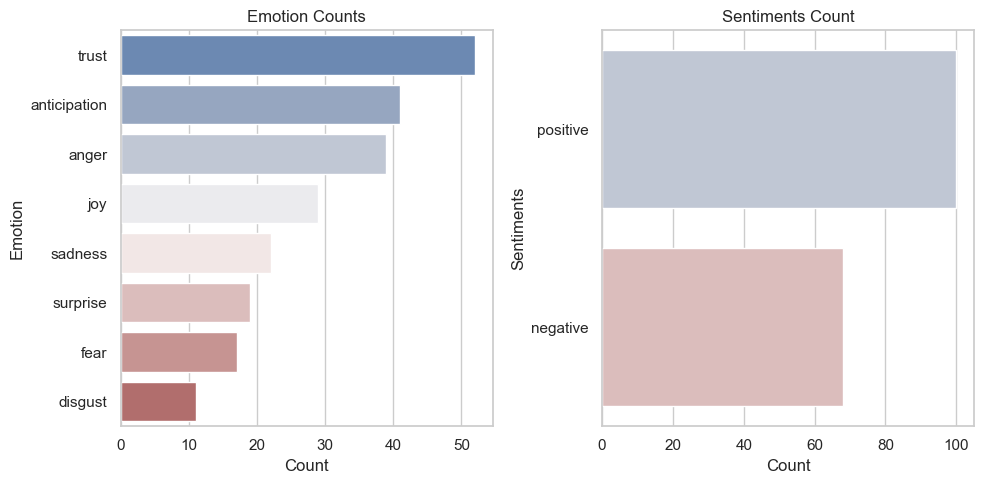

In [55]:
#Bar Plot

fig , ax = plt.subplots(figsize=(10,5),ncols=2)
sns.barplot(emotion_df.sort_values('Count',ascending=False),x='Count',y='Emotion',palette='vlag',ax=ax[0])
ax[0].set_title('Emotion Counts')

sns.barplot(sentiments_df.sort_values('Count',ascending=False),x='Count',y='Emotion',palette='vlag',ax=ax[1])
ax[1].set_ylabel('Sentiments')
ax[1].set_title('Sentiments Count')

plt.tight_layout()
plt.show()

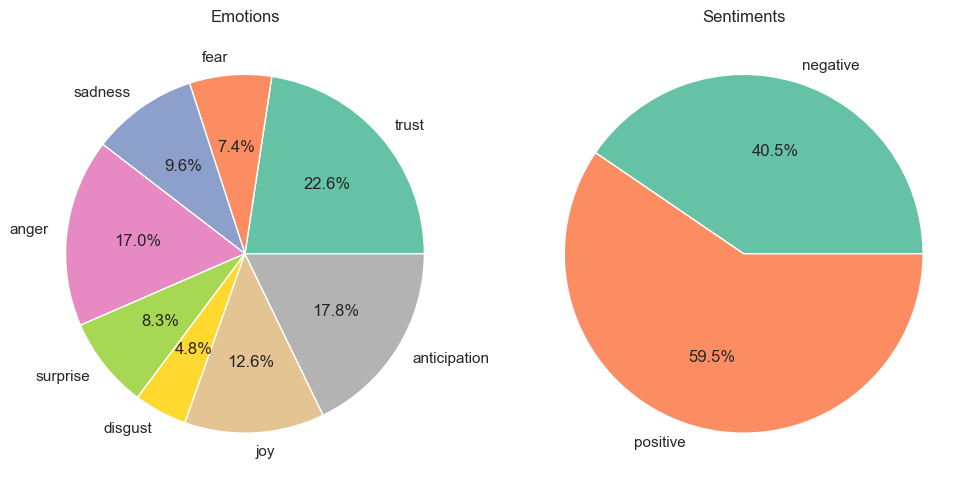

In [56]:
#Pie Plot

fig , ax = plt.subplots(figsize=(10,6),ncols=2)

ax[0].pie(x=emotion_df['Count'],labels=emotion_df['Emotion'],autopct = '%1.1f%%',colors=sns.color_palette('Set2'))
ax[0].set_title('Emotions')

ax[1].pie(x=sentiments_df['Count'],labels=sentiments_df['Emotion'],autopct = '%1.1f%%',colors=sns.color_palette('Set2'))
ax[1].set_title('Sentiments')

plt.tight_layout()
plt.show()

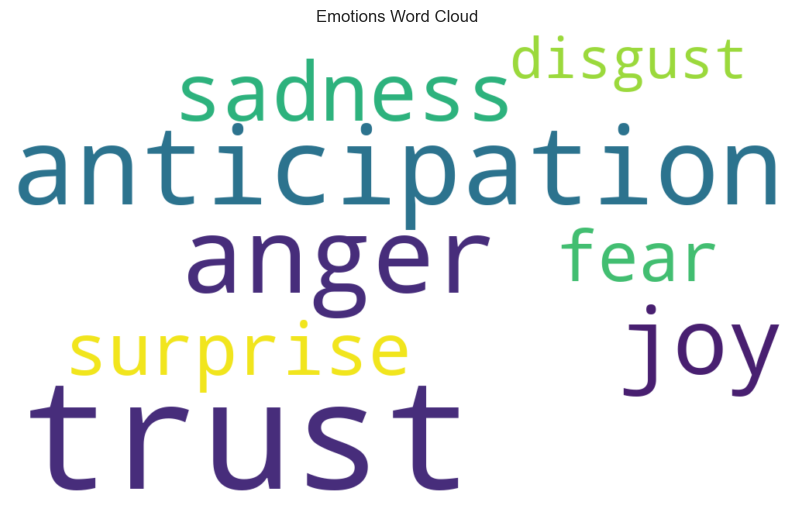

In [57]:
#WordCloud

from wordcloud import WordCloud

text = {row['Emotion'] : row['Count'] for _, row in emotion_df.iterrows()}

wordclouds = WordCloud(width=1000,height=600,background_color='white').generate_from_frequencies(text)

plt.figure(figsize=(10,10))
plt.imshow(wordclouds,interpolation='bilinear')
plt.axis('off')
plt.title('Emotions Word Cloud')
plt.show()

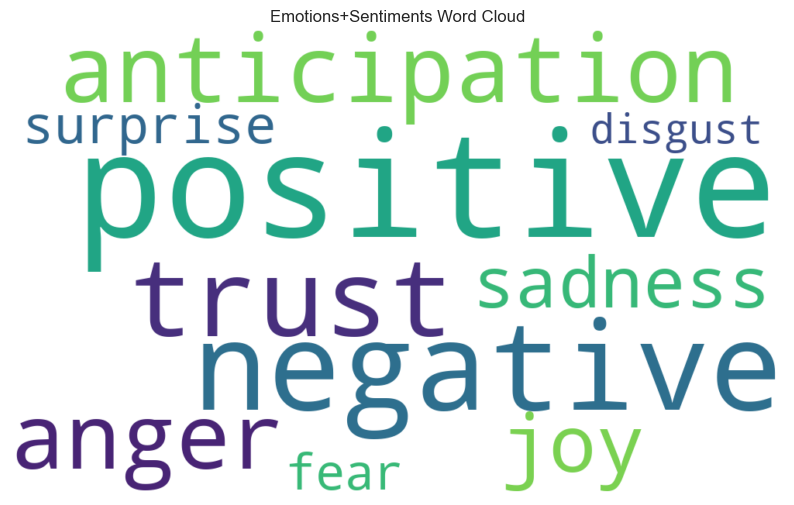

In [58]:
#WordCloud

from wordcloud import WordCloud

text = {row['Emotion'] : row['Count'] for _, row in df.iterrows()}

wordclouds = WordCloud(width=1000,height=600,background_color='white').generate_from_frequencies(text)

plt.figure(figsize=(10,10))
plt.imshow(wordclouds,interpolation='bilinear')
plt.axis('off')
plt.title('Emotions+Sentiments Word Cloud')
plt.show()

<b>Conclusion<br>
<b>From the emotions obtained using NRCLexicon and from the above plots its clear that there is are mixed reviews in relation to the product.<br>
<b>While 22.6% customers express trust followed 17.8% anticipation and around 17% anger which has a mixed opinion by the user<br>
<b>59.5% positivity is found from the reviews<br>
<b>Overall , the prurchase of the product may not be recomendale for everyone

--------------------------------------------------------------------------------------------------------------------------------------------